In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datascience
from datascience import *
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 

In [ ]:
df = pd.read_csv('SpotifyFeatures.csv.zip')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


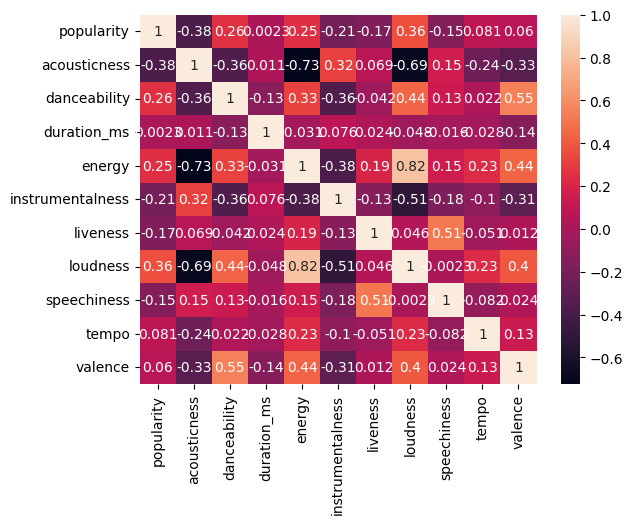

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot= True);

In [ ]:
## Based on the correlation heat map, you can see there is high correlation between energy and loudness

[Text(0.5, 1.0, 'Loudness vs. Energy Correlation')]

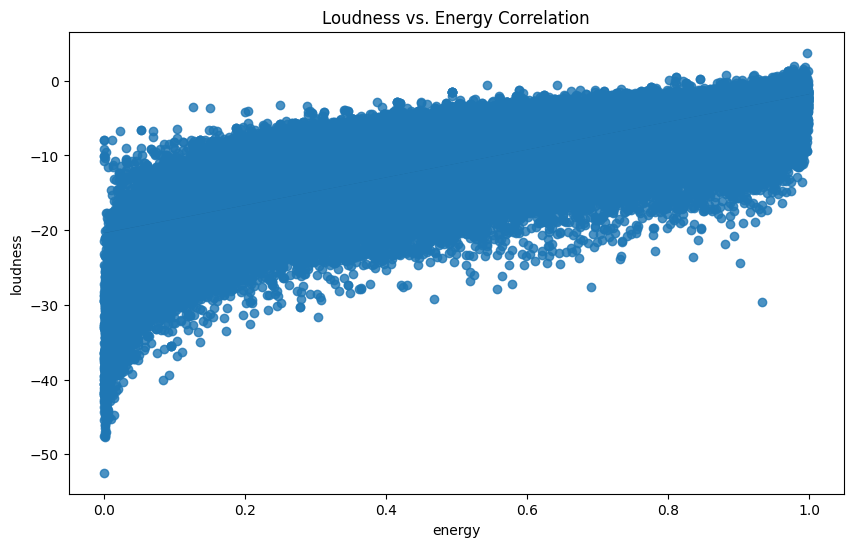

In [ ]:
plt.figure(figsize=(10,6))
# regeration plot regplot
sns.regplot(data = df, y = "loudness", x = "energy").set(title = "Loudness vs. Energy Correlation")

In [ ]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie', 'Classical',
       'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy',
       'Soul', 'Soundtrack', 'World'], dtype=object)

In [ ]:
## LINEAR REGRESSION

songs = df[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = songs.drop(columns='popularity').values
y = songs['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test


x_train:  (186180, 8)
x_test:  (46545, 8)
y_train:  (186180,)
y_test:  (46545,)
X:  (232725, 8)
y:  (232725,)
Train accuracy: 0.214263839171
Test accuracy: 0.214511004268


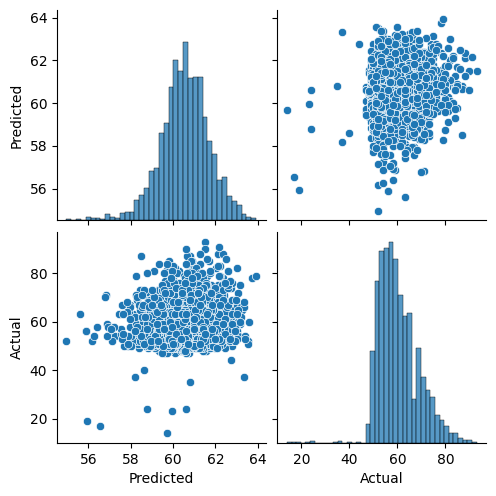

In [ ]:
l_output = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
sns.pairplot(l_output)

In [ ]:
#USING JUST ENERGY AND LOUDNESS

songs = df[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = songs[["energy", "loudness"]].values
y = songs['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test

x_train:  (186180, 2)
x_test:  (46545, 2)
y_train:  (186180,)
y_test:  (46545,)
X:  (232725, 2)
y:  (232725,)
Train accuracy: 0.138158447144
Test accuracy: 0.139779073564


In [ ]:
#DANCE 

dance = df[df['genre'] == 'Dance']
songs = dance[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = dance[["energy", "loudness"]].values
y = dance['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test

x_train:  (6960, 2)
x_test:  (1741, 2)
y_train:  (6960,)
y_test:  (1741,)
X:  (8701, 2)
y:  (8701,)
Train accuracy: 0.0136662751513
Test accuracy: 0.00344784737732


In [ ]:
#POP 

pop = df[df['genre'] == 'Pop']
songs = pop[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = pop[["energy", "loudness"]].values
y = pop['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test

x_train:  (7508, 2)
x_test:  (1878, 2)
y_train:  (7508,)
y_test:  (1878,)
X:  (9386, 2)
y:  (9386,)
Train accuracy: 0.00783503089487
Test accuracy: 0.00153991841784


In [ ]:
#ELECTRONIC 

electronic = df[df['genre'] == 'Electronic']
songs = electronic[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = electronic[["energy", "loudness"]].values
y = electronic['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test

x_train:  (7501, 2)
x_test:  (1876, 2)
y_train:  (7501,)
y_test:  (1876,)
X:  (9377, 2)
y:  (9377,)
Train accuracy: 0.00313856599643
Test accuracy: 0.0039353548252


In [ ]:
#HIPHOP 

hip = df[df['genre'] == 'Hip-Hop']
songs = hip[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = hip[["energy", "loudness"]].values
y = hip['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test

x_train:  (7436, 2)
x_test:  (1859, 2)
y_train:  (7436,)
y_test:  (1859,)
X:  (9295, 2)
y:  (9295,)
Train accuracy: 0.0186611348195
Test accuracy: 0.0348944243668


In [ ]:
#RAP 

rap = df[df['genre'] == 'Rap']
songs = rap[["popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness", "valence"]]
X = rap[["energy", "loudness"]].values
y = rap['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print("X: ",X.shape)
print("y: ",y.shape)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Make predictions and evaluate the model
train_accuracy = linear_model.score(X_train, y_train)
test_accuracy = linear_model.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

LR_score = test_accuracy
y_pred = linear_model.predict(X_test)
t_true = y_test

x_train:  (7385, 2)
x_test:  (1847, 2)
y_train:  (7385,)
y_test:  (1847,)
X:  (9232, 2)
y:  (9232,)
Train accuracy: 0.0200939951234
Test accuracy: 0.0191358696556


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f37fc3b2-c016-4aec-8378-b80652c65a2b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>